In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/main_data.csv')

In [3]:
df

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY,BOX_COUNT
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96,2C88D36D1FC,1
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4127366C,1
2,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4394CE95,1
3,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4D37C804,1
4,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4EA26F92,1
...,...,...,...,...,...,...,...,...
1274082,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,293C58DD9DC,1
1274083,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,29E6A06C99B,1
1274084,288,Standard,Home Delivery - Digital Payment,0.0,3.6,15.96,2A0CABFA0DF,1
1274085,290,Standard,Home Delivery - Digital Payment,12.0,1.8,19.98,28F675D813E,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274087 entries, 0 to 1274086
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   BOX_ID           1274087 non-null  int64  
 1   QUALITY          1274087 non-null  object 
 2   DELIVERY_OPTION  1274087 non-null  object 
 3   MILK             1274087 non-null  float64
 4   MEAT             1274087 non-null  float64
 5   UNIT_PRICE       1274087 non-null  float64
 6   MAGIC_KEY        1274087 non-null  object 
 7   BOX_COUNT        1274087 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 77.8+ MB


In [5]:
df.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY,BOX_COUNT
0,1,Premium,Home Delivery - CoD,0.0,2.7,9.96,2C88D36D1FC,1
1,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4127366C,1
2,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4394CE95,1
3,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4D37C804,1
4,2,Premium,Home Delivery - CoD,0.0,2.3,11.96,2BC4EA26F92,1


In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder() #creating an instance of that encoder

In [7]:
rank = ['Standard', 'Premium'] #defining the rank or order
oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['QUALITY'] = oe.fit_transform(df[['QUALITY']]) #encoding the column

In [8]:
rank = ['Home Delivery - Digital Payment', 'Home Delivery - CoD', 'Delivery from Collection Point'] #defining the rank or order
oe = OrdinalEncoder(categories = [rank]) #creating another instance using custom rank
df['DELIVERY_OPTION'] = oe.fit_transform(df[['DELIVERY_OPTION']]) #encoding the column

In [9]:
from sklearn.preprocessing import LabelEncoder #importing the labenconder
le = LabelEncoder() #creating an instance of LabelEncoder

df['MAGIC_KEY_ENCODED'] = le.fit_transform(df['MAGIC_KEY'])
df_encoded = df.drop(columns = ['MAGIC_KEY'])

In [10]:
df_encoded.head()

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,1,1.0,1.0,0.0,2.7,9.96,1,907647
1,2,1.0,1.0,0.0,2.3,11.96,1,344150
2,2,1.0,1.0,0.0,2.3,11.96,1,344709
3,2,1.0,1.0,0.0,2.3,11.96,1,346734
4,2,1.0,1.0,0.0,2.3,11.96,1,347034


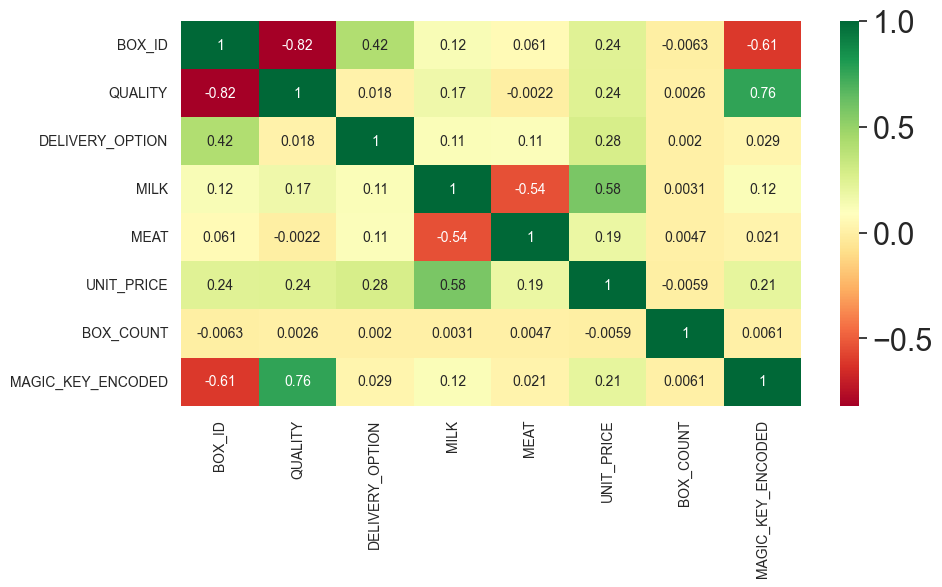

In [11]:
sns.set(font_scale = 2)
plt.subplots(figsize = (10, 5))
heat_plot = sns.heatmap(df_encoded.corr(method = 'pearson'), annot = True, cmap = 'RdYlGn', annot_kws={'size': 10})

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

plt.show()

In [12]:
correlation = df_encoded.corr(method = 'pearson') #finding all correlation between each features
print(correlation['BOX_ID'].sort_values(ascending = False).to_string()) #printing correlation with class in descending order

BOX_ID               1.000000
DELIVERY_OPTION      0.415151
UNIT_PRICE           0.237738
MILK                 0.124559
MEAT                 0.060570
BOX_COUNT           -0.006333
MAGIC_KEY_ENCODED   -0.606745
QUALITY             -0.817314


In [13]:
from sklearn.utils import shuffle #importing the suffle module
shuffled_df = shuffle(df_encoded)
shuffled_df #checking

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
1270925,272,0.0,2.0,16.0,2.2,19.98,1,285208
249728,89,1.0,2.0,10.0,0.0,12.18,1,496575
440176,118,1.0,2.0,8.0,1.3,15.98,1,527695
803693,162,1.0,2.0,10.0,2.2,23.98,1,1165240
897591,163,1.0,2.0,11.0,2.2,23.98,1,1054116
...,...,...,...,...,...,...,...,...
338469,103,1.0,2.0,0.0,4.0,15.96,1,459625
385539,106,1.0,2.0,0.0,3.3,15.96,1,802966
682785,143,1.0,2.0,16.0,1.8,19.98,1,959364
108298,31,1.0,1.0,8.0,1.3,15.98,1,380641


In [14]:
#rearranging the index value
rearranged_df = shuffled_df.reset_index(drop = True)
rearranged_df

,BOX_ID,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,272,0.0,2.0,16.0,2.2,19.98,1,285208
1,89,1.0,2.0,10.0,0.0,12.18,1,496575
2,118,1.0,2.0,8.0,1.3,15.98,1,527695
3,162,1.0,2.0,10.0,2.2,23.98,1,1165240
4,163,1.0,2.0,11.0,2.2,23.98,1,1054116
...,...,...,...,...,...,...,...,...
1274082,103,1.0,2.0,0.0,4.0,15.96,1,459625
1274083,106,1.0,2.0,0.0,3.3,15.96,1,802966
1274084,143,1.0,2.0,16.0,1.8,19.98,1,959364
1274085,31,1.0,1.0,8.0,1.3,15.98,1,380641


In [15]:
X = rearranged_df.drop(columns = ['BOX_ID']) #dropping the class collumn to separate the feature
X

,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,0.0,2.0,16.0,2.2,19.98,1,285208
1,1.0,2.0,10.0,0.0,12.18,1,496575
2,1.0,2.0,8.0,1.3,15.98,1,527695
3,1.0,2.0,10.0,2.2,23.98,1,1165240
4,1.0,2.0,11.0,2.2,23.98,1,1054116
...,...,...,...,...,...,...,...
1274082,1.0,2.0,0.0,4.0,15.96,1,459625
1274083,1.0,2.0,0.0,3.3,15.96,1,802966
1274084,1.0,2.0,16.0,1.8,19.98,1,959364
1274085,1.0,1.0,8.0,1.3,15.98,1,380641


In [16]:
y =  rearranged_df['BOX_ID'] #separating target to y
y

0          272
1           89
2          118
3          162
4          163
          ... 
1274082    103
1274083    106
1274084    143
1274085     31
1274086     24
Name: BOX_ID, Length: 1274087, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split #importing module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) #80-20% split

In [18]:
print(len(X_train)) #checking
print(len(X_test))

1019269
254818


In [19]:
print(len(y_train)) #checking
print(len(y_test))

1019269
254818


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree_clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_clf.fit(X, y)
tree_clf.feature_importances_

array([0.14384212, 0.01991818, 0.34601494, 0.24079475, 0.24943001,
       0.        , 0.        ])

In [22]:
#creating instance of decision tree, depth 2
tree_clf = DecisionTreeClassifier(max_depth = 20, random_state = 42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [23]:
y_pred = tree_clf.predict(X_test)

In [24]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9999568319349497

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.9999097395003492

In [ ]:
df_problem = pd.read_csv('Datasets/problem 2.csv')
df_problem

In [30]:
df = df.drop(columns = ['BOX_ID'])
df

,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,MAGIC_KEY,BOX_COUNT,MAGIC_KEY_ENCODED
0,1.0,1.0,0.0,2.7,9.96,2C88D36D1FC,1,907647
1,1.0,1.0,0.0,2.3,11.96,2BC4127366C,1,344150
2,1.0,1.0,0.0,2.3,11.96,2BC4394CE95,1,344709
3,1.0,1.0,0.0,2.3,11.96,2BC4D37C804,1,346734
4,1.0,1.0,0.0,2.3,11.96,2BC4EA26F92,1,347034
...,...,...,...,...,...,...,...,...
1274082,0.0,0.0,0.0,3.6,15.96,293C58DD9DC,1,244323
1274083,0.0,0.0,0.0,3.6,15.96,29E6A06C99B,1,316993
1274084,0.0,0.0,0.0,3.6,15.96,2A0CABFA0DF,1,331756
1274085,0.0,0.0,12.0,1.8,19.98,28F675D813E,1,117129


In [31]:
df_test = pd.merge(df_problem, df, on = 'MAGIC_KEY')
df_test

,MAGIC_KEY,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,2C0B5F97180,1.0,2.0,12.0,1.8,19.98,1,594331
1,2C2F659EF00,1.0,2.0,16.0,1.8,19.98,1,697598
2,29D629EDF20,0.0,2.0,10.7,0.0,12.78,1,309141
3,2A7073E2FF0,0.0,2.0,8.5,0.0,10.14,1,338384
4,2A9B9BE1210,0.0,2.0,16.0,2.0,19.98,1,339823
...,...,...,...,...,...,...,...,...
43513,2C49A3D7EAD,1.0,2.0,10.0,1.8,19.98,1,764666
43514,2C49C75F0D8,1.0,0.0,0.0,2.9,15.96,1,764760
43515,2C49CA2A632,1.0,2.0,0.0,3.6,15.96,1,764777
43516,2C49D52753F,1.0,1.0,12.0,1.8,19.98,1,764867


In [32]:
df_test_X = df_test.drop(columns = ['MAGIC_KEY'])
df_test_X

,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED
0,1.0,2.0,12.0,1.8,19.98,1,594331
1,1.0,2.0,16.0,1.8,19.98,1,697598
2,0.0,2.0,10.7,0.0,12.78,1,309141
3,0.0,2.0,8.5,0.0,10.14,1,338384
4,0.0,2.0,16.0,2.0,19.98,1,339823
...,...,...,...,...,...,...,...
43513,1.0,2.0,10.0,1.8,19.98,1,764666
43514,1.0,0.0,0.0,2.9,15.96,1,764760
43515,1.0,2.0,0.0,3.6,15.96,1,764777
43516,1.0,1.0,12.0,1.8,19.98,1,764867


In [33]:
y_pred = tree_clf.predict(df_test_X)
y_pred

array([137, 143, 238, ..., 108,  40, 134], dtype=int64)

In [34]:
# Add the predicted values as a new column to X_test
df_test['BOX_ID'] = y_pred

# Now X_test contains the predicted values in the 'y_pred' column
df_test

,MAGIC_KEY,QUALITY,DELIVERY_OPTION,MILK,MEAT,UNIT_PRICE,BOX_COUNT,MAGIC_KEY_ENCODED,BOX_ID
0,2C0B5F97180,1.0,2.0,12.0,1.8,19.98,1,594331,137
1,2C2F659EF00,1.0,2.0,16.0,1.8,19.98,1,697598,143
2,29D629EDF20,0.0,2.0,10.7,0.0,12.78,1,309141,238
3,2A7073E2FF0,0.0,2.0,8.5,0.0,10.14,1,338384,231
4,2A9B9BE1210,0.0,2.0,16.0,2.0,19.98,1,339823,270
...,...,...,...,...,...,...,...,...,...
43513,2C49A3D7EAD,1.0,2.0,10.0,1.8,19.98,1,764666,134
43514,2C49C75F0D8,1.0,0.0,0.0,2.9,15.96,1,764760,182
43515,2C49CA2A632,1.0,2.0,0.0,3.6,15.96,1,764777,108
43516,2C49D52753F,1.0,1.0,12.0,1.8,19.98,1,764867,40


In [35]:
solutions = df_test[['MAGIC_KEY', 'BOX_ID']].copy()
solutions

,MAGIC_KEY,BOX_ID
0,2C0B5F97180,137
1,2C2F659EF00,143
2,29D629EDF20,238
3,2A7073E2FF0,231
4,2A9B9BE1210,270
...,...,...
43513,2C49A3D7EAD,134
43514,2C49C75F0D8,182
43515,2C49CA2A632,108
43516,2C49D52753F,40


In [36]:
solutions.to_csv("Submission.csv", index=False)  # Save test data